In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 1. Load cleaned dataset
df = pd.read_csv(r"C:\Users\Michael Antonucci\OneDrive\Documents\MISY331 Final Project\heart_cleaned_final.csv")


In [ ]:
# 2. Encode target and categorical features
df["HeartDisease"] = df["HeartDisease"].map({"Yes": 1, "No": 0})
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Drop target variable for unsupervised clustering
X = df_encoded.drop("HeartDisease", axis=1)


In [ ]:
# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Elbow Method and Silhouette Scores
inertia = []
sil_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

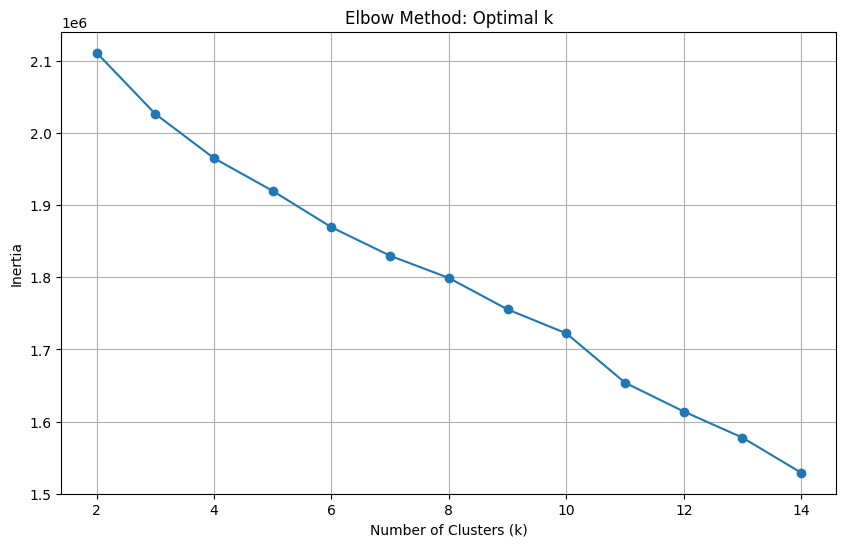

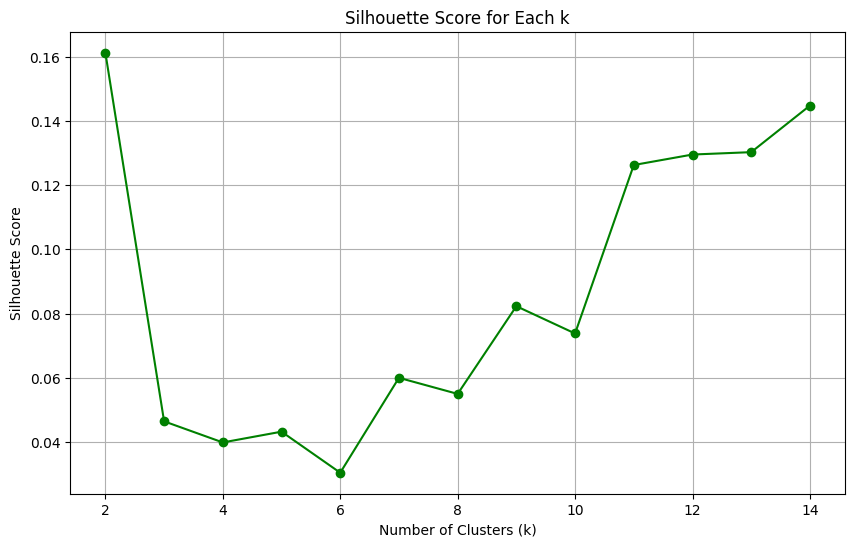

In [ ]:
# 6. Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 7. Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score for Each k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# 8. Apply KMeans with optimal k
optimal_k = 4  # Set based on Elbow/Silhouette plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)
df_encoded['Cluster'] = cluster_labels

In [ ]:
# 9. Export model and clustered data
with open("clustering_model.p", "wb") as f:
    pickle.dump(kmeans_final, f)

df_encoded.to_csv("heart_2020_clustered.csv", index=False)